<a href="https://colab.research.google.com/github/Naga-SDonepudi/PyTorch_HandsOn/blob/main/Classification_of_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Network Classification
* Classification is a technique of predicting a thing (whether this or that). There can be multiple things.
* Three categories ie
  * Binary Classification
  * Multi-class Classification
  * Multi-label Classification

### 1. Preparing Classification Data
* The data worked on is a toy dataset ie which is a smaller dataset for experimenting and practicing fundamnetals of NN classification.

In [4]:
import sklearn

In [5]:
sklearn.__version__

'1.6.1'

In [6]:
from sklearn.datasets import make_circles

# Making 10000 samples
n_samples = 10000

# Creating circles and storing in X and y
X, y = make_circles(n_samples,
                    noise=0.05,
                    random_state=42)

In [7]:
len(X), len(y)

(10000, 10000)

In [8]:
print(f"First 5 samples X:\n {X[:5]}")
print(f"First 5 samples y:\n {y[:5]}")

First 5 samples X:
 [[ 0.07878909  0.84129891]
 [ 1.06031373 -0.46442377]
 [-0.59360512  0.77566784]
 [ 1.00937035 -0.3295898 ]
 [ 0.83372061 -0.53454934]]
First 5 samples y:
 [1 0 0 0 0]


In [9]:
# Making a DataFrame by importing pandas, and setting X(features) values as X1,X2 and y(labels) values as label using a python dictionary
import pandas as pd
import numpy as np

circles = pd.DataFrame({"X1" : X[:, 0],
                        "X2" : X[:, 1],
                        "label" : y})
circles.head(5)

,X1,X2,label
0,0.078789,0.841299,1
1,1.060314,-0.464424,0
2,-0.593605,0.775668,0
3,1.009370,-0.329590,0
4,0.833721,-0.534549,0


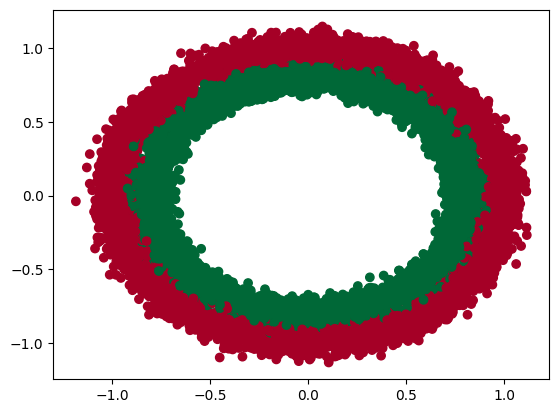

In [10]:
# Using matplotlib for visualizing
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlGn);


In [11]:
X.shape, y.shape

((10000, 2), (10000,))

### Viewing the values of first samples of X and y. Then viewing the shapes of those samples (X first sample shape would be 2 as it has two features and y first sample shape would be none as it is a scalar)

In [12]:
X_sample = X[0]
y_sample = y[0]

print(f"Values of first sample of X: {X_sample} and first sample of y: {y_sample}")
print(f"Shapes of first sample of X: {X_sample.shape} and first sample of y: {y_sample.shape}")

Values of first sample of X: [0.07878909 0.84129891] and first sample of y: 1
Shapes of first sample of X: (2,) and first sample of y: ()


## 1.1 Turning Data into tensors
* The data created is in numpy array format
* The dtype of numpy array is int64, and to change to tensor, the default dtype is float32
* Changing the sample of X and y from numpy array to tensors using type

In [13]:
y.dtype

dtype('int64')

In [14]:
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:10], y[:10]

(tensor([[ 0.0788,  0.8413],
         [ 1.0603, -0.4644],
         [-0.5936,  0.7757],
         [ 1.0094, -0.3296],
         [ 0.8337, -0.5345],
         [-0.1630,  0.7638],
         [ 0.7991,  0.6348],
         [ 0.6887,  0.1558],
         [-0.1275,  0.8003],
         [ 0.8481,  0.4934]]),
 tensor([1., 0., 0., 0., 0., 1., 0., 1., 1., 0.]))

In [15]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

### 1.2 Splittin data into training and testing

In [16]:
torch.manual_seed(42)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [17]:
len(X_train), len(X_test), len(y_train), len(y_test)

(8000, 2000, 8000, 2000)

## 2. Building a Model
* Before buildin a model, we must figure out:
  * Setting up an device agnostic code, so that the code will run on GPU (if GPU is available)
  * Constructing a model by subclassing the nn.Module which is a base class
    * nn.Module as subclass
    * nn.Linear() layer for handling shapes of data
    * Defining a forward method for forward pass of model
    * Instantiating the model
  * Defining a loss function and optimizer
  * Creating a training loop and testing loop

In [18]:
import torch
from torch import nn

# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### 2.1 Constructing a Model by using nn.Module as subclass

In [19]:
# Constructing a Model by using nn.Module as subclass
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    # Creating 2 nn.Linear() layers
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # TAKES IN 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # Takes in 5 features from previous layer and outputs 1 feature

  # Defining a forward method
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

  # Instantiating an instance
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
device

'cpu'

In [21]:
next(model_1.parameters()).device

device(type='cpu')

### 2.2 Replicating the above model in a simpler way ie nn.Sequential()

In [22]:
## Replicating the above model in a simpler way ie nn.Sequential()
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    # Using nn.Sequential() layer
    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1))

  # Defining forward method
  def forward(self, x):
    return self.two_linear_layers(x)

# Instantiating an instanace
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [23]:
# Checking the number of params ie in and out features using state_dict
model_1.state_dict()

OrderedDict([('two_linear_layers.0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('two_linear_layers.0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('two_linear_layers.1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('two_linear_layers.1.bias', tensor([-0.1213]))])

In [24]:
# Making Some predictions
with torch.inference_mode():
  untrained_predictions = model_1(X_test.to(device))

print(f"Length of the predictions: {len(untrained_predictions)}, Shape of the predictions: {untrained_predictions.shape}")
print(f"Length of the test samples: {len(X_test)}, Shape of the test samples: {X_test.shape}")
print(f"\nFirst ten predictions: \n{untrained_predictions[:10]}")

print(f"\nFirst ten labels: \n{y_test[:10]}")

Length of the predictions: 2000, Shape of the predictions: torch.Size([2000, 1])
Length of the test samples: 2000, Shape of the test samples: torch.Size([2000, 2])

First ten predictions: 
tensor([[-0.0078],
        [ 0.1749],
        [ 0.3089],
        [ 0.1874],
        [-0.0782],
        [ 0.2633],
        [ 0.2499],
        [ 0.2674],
        [ 0.2285],
        [ 0.0358]])

First ten labels: 
tensor([1., 1., 0., 1., 0., 1., 1., 1., 1., 1.])


### 2.3 Setting up an Loss Function and a Optimizer
* For binary classification problems, we can use Binary Cross Entropy Loss Function ie **torch.nn.BCEWithLogitsLoss()** it has sigmoid activation function built in
* Two of the most common optimizers are SGD and Adam ie *torch.optim*

In [25]:
## Loss Function
Loss_Fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [26]:
# Calculating accuracy (Helpful with classification problems) - out of 100 attempts, what percentage is model right
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

### 3. Training the model
* Needs a training loop for training the model
  1. Forward pass
  2. Calculate the loss
  3. Zero Grad optimization
  4. Backward prop
  5. Optimization grad descent

### 3.1 Logits -- Prediction Probabilities -- Prediction Labels
* The model's outputs will be **logits** ie **raw outputs** of a NN model before applying the activation function.
* The conversion of logits to pred probabilities can be done by making them pass through activation function **sigmoid**
* Then the prediction probabilites should be conversted to prediction labels by rounding them off or using argmax() function

In [27]:
## Viewing the first 5 outputs of forward pass on test data
model_1.eval()
with torch.inference_mode():
  y_logits = model_1(X_test.to(device))[:5]
y_logits

tensor([[-0.0078],
        [ 0.1749],
        [ 0.3089],
        [ 0.1874],
        [-0.0782]])

In [28]:
## Using the activation function ie sigmoid to convert logits to Prediction probabilities
y_pred_prob_logits = torch.sigmoid(y_logits)
y_pred_prob_logits

tensor([[0.4981],
        [0.5436],
        [0.5766],
        [0.5467],
        [0.4805]])

### Used a round function, which rounds the values to 1 ie class 1 (if >0.5) and 0 ie class 2 (if <0.5)

In [29]:
# Fining the prediction labels
y_preds = torch.round(y_pred_prob_logits)
y_preds[:5]

tensor([[0.],
        [1.],
        [1.],
        [1.],
        [0.]])

In [30]:
y_test[:5]

tensor([1., 1., 0., 1., 0.])

### 3.2 Building a training and testing loop

In [31]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 400

# Putting the data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Building a training and eval loop
for epoch in range(epochs):
  ## Train
  model_1.train()

  ## Forward pass
  y_logits_pred = model_1(X_train).squeeze()
  y_pred_lab = torch.round(torch.sigmoid(y_logits_pred))  # Turns logits to prediction probabilitites and prediction lables in one line

  ## Calculating loss (using BCEWithLogits) and accuracy
  loss = Loss_Fn(y_logits_pred,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred_lab)

  ## Optimizer zero grad
  optimizer.zero_grad()

  ## Loss backward prop
  loss.backward()

  ## Optimizer step (updates the params to reduce gradient ie grad descent)
  optimizer.step()

  ## Testing Loo
  model_1.eval()
  with torch.inference_mode():

    # Forward pass
    test_logits = model_1(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    ## Caluclating test loss and accuracy
    test_loss = Loss_Fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_preds)

    ## Printing out whats goin on
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Train Loss: {loss:.5f}, Train Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc:{test_acc:.2f}%")

Epoch: 0 | Train Loss: 0.69741, Train Acc: 53.37% | Test Loss: 0.69659, Test Acc:52.90%
Epoch: 10 | Train Loss: 0.69557, Train Acc: 51.96% | Test Loss: 0.69477, Test Acc:52.05%
Epoch: 20 | Train Loss: 0.69468, Train Acc: 51.42% | Test Loss: 0.69391, Test Acc:52.90%
Epoch: 30 | Train Loss: 0.69418, Train Acc: 50.85% | Test Loss: 0.69348, Test Acc:52.30%
Epoch: 40 | Train Loss: 0.69387, Train Acc: 50.68% | Test Loss: 0.69326, Test Acc:51.90%
Epoch: 50 | Train Loss: 0.69367, Train Acc: 50.64% | Test Loss: 0.69314, Test Acc:51.50%
Epoch: 60 | Train Loss: 0.69353, Train Acc: 50.71% | Test Loss: 0.69309, Test Acc:51.65%
Epoch: 70 | Train Loss: 0.69344, Train Acc: 50.58% | Test Loss: 0.69306, Test Acc:51.95%
Epoch: 80 | Train Loss: 0.69336, Train Acc: 50.58% | Test Loss: 0.69306, Test Acc:51.75%
Epoch: 90 | Train Loss: 0.69331, Train Acc: 50.78% | Test Loss: 0.69307, Test Acc:51.60%
Epoch: 100 | Train Loss: 0.69328, Train Acc: 50.60% | Test Loss: 0.69309, Test Acc:51.75%
Epoch: 110 | Train Lo

### 4. Making Predictions and evaluation
* used a function called plot_decision_boundary()

In [32]:
import requests
from pathlib import Path

# Downloading helper functions from Learn PyTorch Repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("downloading helper functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

downloading helper functions.py


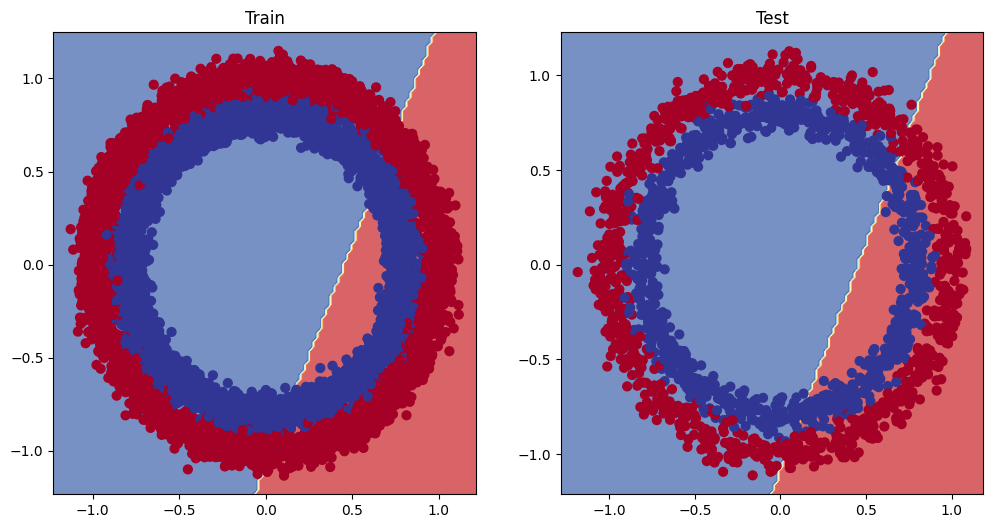

In [33]:
# plotting decsison boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5. Improving the model through experimentation
* Model can be improved by adding more layers which in result learns more about patterns in data
* Adding more hidden units ie 5 to 10
* Epoch to 1000
* Changing the activation function
* lr

In [34]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_2 = CircleModelV2().to(device)
model_2

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [35]:
model_2.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [36]:
## Creating a loss function
Loss_Fn_2 =  nn.BCEWithLogitsLoss()

## Optimizer
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [37]:
# Training and eval loop for model 2
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 2000

# Device agnostic code
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_2.train()

  ## Forward Pass
  y_logits_pred_2 = model_2(X_train).squeeze()
  y_pred_lab_2 = torch.round(torch.sigmoid(y_logits_pred_2))  # Logits to prob predictions to prediction labels

  ## Calculating loss and accuracy
  loss = Loss_Fn_2(y_logits_pred_2, y_train)
  acc = accuracy_fn(y_true = y_train, y_pred = y_pred_lab_2)

  ## Optimizer zero grad
  optimizer.zero_grad()

  ## Back Propagation
  loss.backward()

  ## Optimization
  optimizer.step()


  ### Testing Loop
  model_2.eval()
  with torch.inference_mode():

    ## Forward pass
    test_logits_2 = model_2(X_test).squeeze()
    test_pred_lab_2 = torch.round(torch.sigmoid(test_logits_2))

    ## Loss calculation
    test_loss_2 = Loss_Fn_2(test_logits_2, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred_lab_2)

  # Printing out whats goin on
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train Loss: {loss:.5f}, Train Acc: {acc:.2f}% | Test Loss: {test_loss_2:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Train Loss: 0.69361, Train Acc: 50.89% | Test Loss: 0.69406, Test Acc: 50.05%
Epoch: 100 | Train Loss: 0.69315, Train Acc: 51.01% | Test Loss: 0.69335, Test Acc: 50.30%
Epoch: 200 | Train Loss: 0.69313, Train Acc: 51.71% | Test Loss: 0.69331, Test Acc: 50.50%
Epoch: 300 | Train Loss: 0.69313, Train Acc: 52.12% | Test Loss: 0.69331, Test Acc: 50.95%
Epoch: 400 | Train Loss: 0.69313, Train Acc: 52.08% | Test Loss: 0.69332, Test Acc: 51.05%
Epoch: 500 | Train Loss: 0.69313, Train Acc: 51.92% | Test Loss: 0.69332, Test Acc: 51.10%
Epoch: 600 | Train Loss: 0.69313, Train Acc: 51.99% | Test Loss: 0.69332, Test Acc: 51.05%
Epoch: 700 | Train Loss: 0.69313, Train Acc: 51.96% | Test Loss: 0.69332, Test Acc: 51.05%
Epoch: 800 | Train Loss: 0.69313, Train Acc: 51.96% | Test Loss: 0.69332, Test Acc: 51.15%
Epoch: 900 | Train Loss: 0.69313, Train Acc: 51.95% | Test Loss: 0.69332, Test Acc: 51.10%
Epoch: 1000 | Train Loss: 0.69313, Train Acc: 51.95% | Test Loss: 0.69332, Test Acc: 51.10%


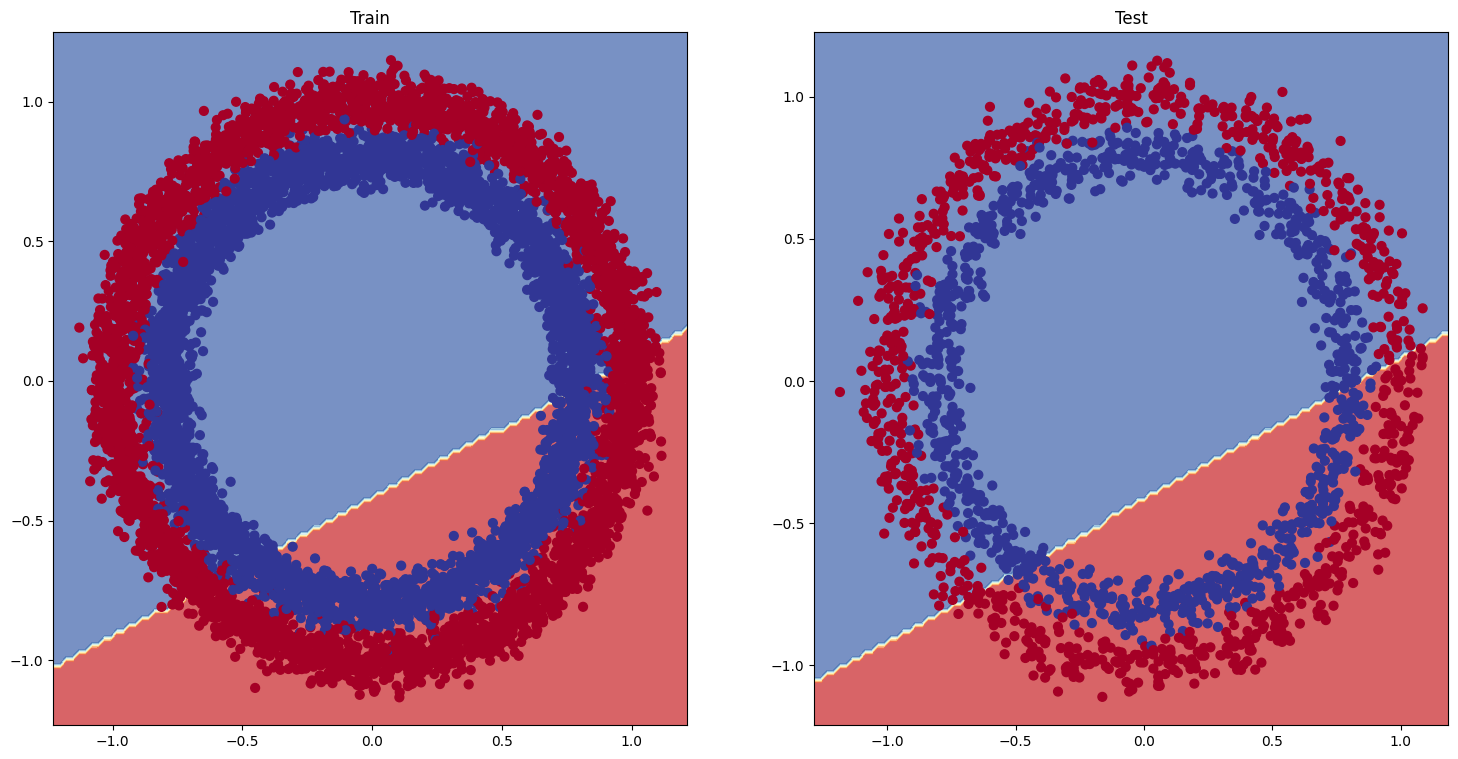

In [38]:
## Plotting the decision boundary
plt.figure(figsize=(18, 9))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)

## 6. Introducing Non-linearity

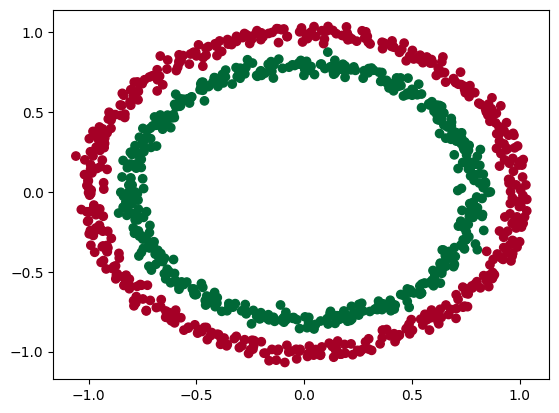

In [39]:
## Recreating non-linear data, and plotting data

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0],
            X[:, 1],
            c=y,
            cmap=plt.cm.RdYlGn)

## 6.1 Converting data to tensors, and splitting to train and test

In [40]:
## Data to tensors, followed by train and test data
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:10], y_train[:10]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994],
         [-0.8837, -0.4678],
         [-0.3836,  0.6987],
         [ 0.6047,  0.5163],
         [-0.5869,  0.7804],
         [ 0.8833, -0.5178]]),
 tensor([1., 0., 0., 0., 1., 0., 1., 1., 0., 0.]))

## 6.2 Building a Neural Network model with non-linear activation function

In [41]:
from torch import nn

class CircleModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU()

  # Putting the relu function inside the layers
  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV3().to(device)
model_3

CircleModelV3(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [42]:
model_3.state_dict()


OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

## 6.3 Training and testing loop


In [43]:
## Setting up Loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr = 0.1)

In [44]:
## Training

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 2000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_3.train()

  # Forward Pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # Logits to Pred Prob to Pred Labels

  # Calculate loss
  loss = loss_fn(y_logits, y_train) # BCEWithLogits takes in logits as first input
  acc = accuracy_fn(y_true=y_train,
                 y_pred=y_pred)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Loss Backward propagation
  loss.backward()

  # Optimization Gradient descent
  optimizer.step()

  ## Testing loop
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Printing out whats happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train Loss: {loss:.4f}, Train Acc:{acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Train Loss: 0.6929, Train Acc:50.00% | Test Loss: 0.6932, Test Acc: 50.00%
Epoch: 100 | Train Loss: 0.6912, Train Acc:52.88% | Test Loss: 0.6910, Test Acc: 52.50%
Epoch: 200 | Train Loss: 0.6898, Train Acc:53.37% | Test Loss: 0.6894, Test Acc: 55.00%
Epoch: 300 | Train Loss: 0.6879, Train Acc:53.00% | Test Loss: 0.6872, Test Acc: 56.00%
Epoch: 400 | Train Loss: 0.6852, Train Acc:52.75% | Test Loss: 0.6841, Test Acc: 56.50%
Epoch: 500 | Train Loss: 0.6810, Train Acc:52.75% | Test Loss: 0.6794, Test Acc: 56.50%
Epoch: 600 | Train Loss: 0.6751, Train Acc:54.50% | Test Loss: 0.6729, Test Acc: 56.00%
Epoch: 700 | Train Loss: 0.6666, Train Acc:58.38% | Test Loss: 0.6632, Test Acc: 59.00%
Epoch: 800 | Train Loss: 0.6516, Train Acc:64.00% | Test Loss: 0.6476, Test Acc: 67.50%
Epoch: 900 | Train Loss: 0.6236, Train Acc:74.00% | Test Loss: 0.6215, Test Acc: 79.00%
Epoch: 1000 | Train Loss: 0.5682, Train Acc:87.75% | Test Loss: 0.5738, Test Acc: 86.50%
Epoch: 1100 | Train Loss: 0.4815,

## 6.4 Evaluating the model predictions on X_test data and comparing with y_test data

In [45]:
## Predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

## Plotting the predictions of non linear model

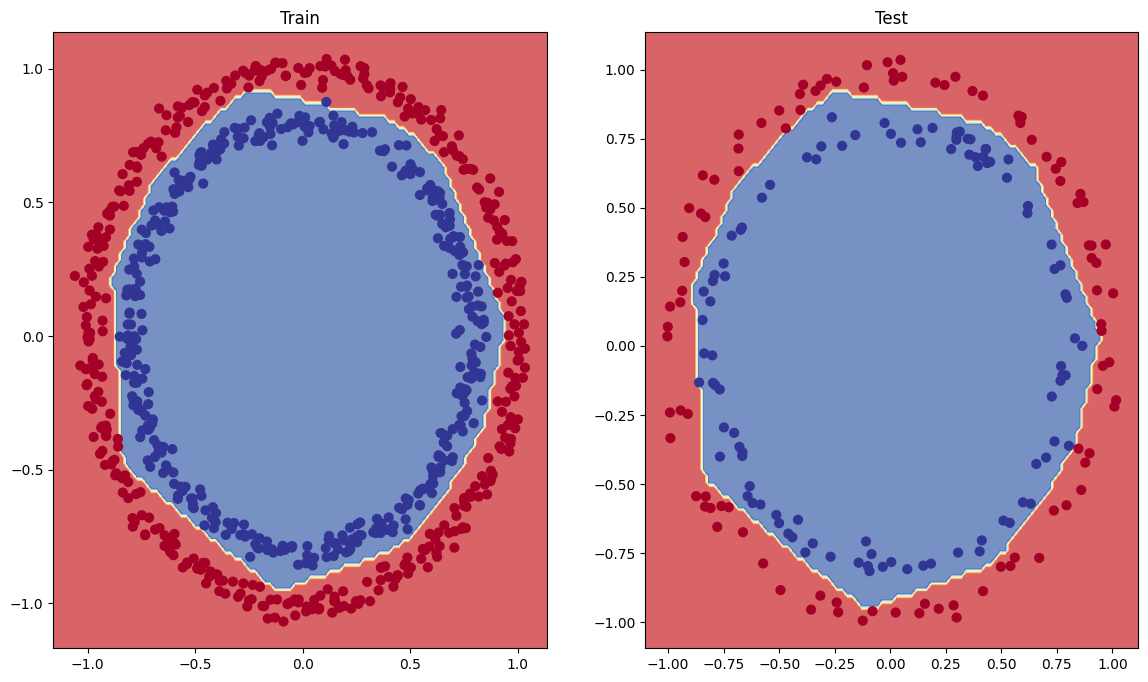

In [46]:

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## Replicating Non-linear Activation Functions

In [47]:
# Creating a tensor
X = torch.arange(-8, 8, 1, dtype = torch.float32)
X

tensor([-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
         6.,  7.])

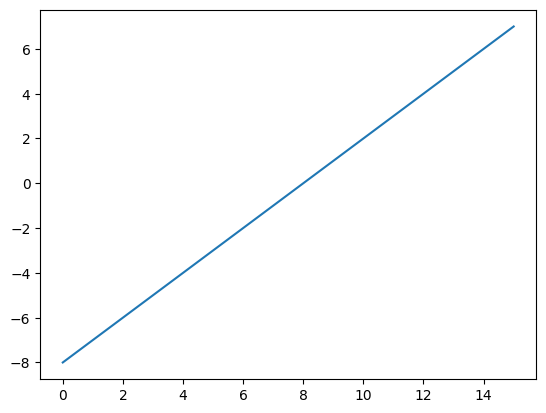

In [48]:
plt.plot(X);

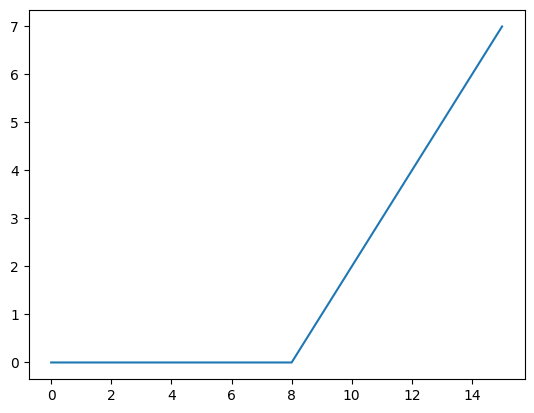

In [49]:
plt.plot(torch.relu(X));

### Performing ReLU function on this
* ReLU Rectified Linear Unit activation function kills the negative values and keeps the positive one's unchanged.

In [50]:
def relu(x):
  return torch.maximum(torch.tensor(0), x)

relu(X)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.])

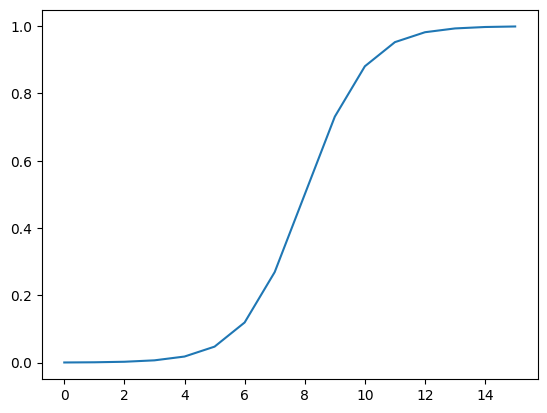

In [51]:
## For sigmoid
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

plt.plot(torch.sigmoid(X));

## 7. Multi-Class Classification
* Binary Classification stands for one thing or other (this or that)
* Multi class means more than single or two things
  * Input Layer Shape: Same as binary(in_features = number of features in input data)
  * Hidden Layers: Same as binary(1 to unlimited)
  * Neurons per hidden layer: Same as binary (5 to 512)
  * Output layer shape: 1 per class
  * Hidden layer activation: same as binary (ReLU)
  * Output Activation: Softmax (sigmoid in binary)
  * Loss Function: Cross Entrophy (BCE for binary)
  * Optimizer: same as binary (SGD)

### 7.1 Creating a dataset

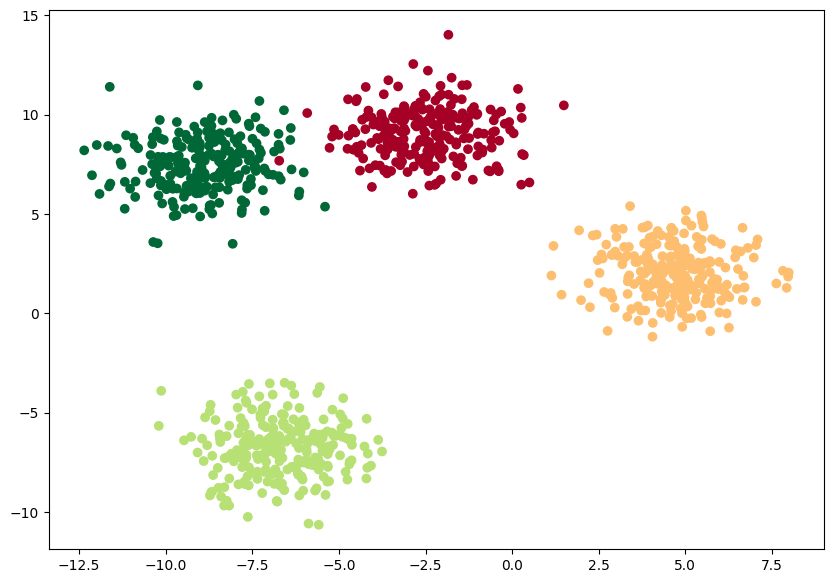

In [52]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Setting up the hyperparams for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

## Creating multi class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.3,
                            random_state = RANDOM_SEED)

## Turning data to tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

## Splitting to train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

## Plotting the data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlGn);

### 7.2 Building the model using the data

In [60]:
## Device Agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [61]:
## A multi class classification model
class BlobModel1(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8):
    """
    Multi-Class classfication
    Args:
      in features : Number of input features to model
      out features : Number of output features/output classes
      hidden units : Number of hidden units between layers (default is 8)
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Creating an instance
model_4 = BlobModel1(input_features =2,
                     output_features=4,
                     hidden_units=8).to(device)

model_4

BlobModel1(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [67]:
model_4.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[ 0.2624,  0.6641],
                      [-0.0997, -0.0055],
                      [-0.1628, -0.5904],
                      [ 0.3393, -0.7020],
                      [ 0.4390,  0.5291],
                      [ 0.6687, -0.1668],
                      [-0.5810,  0.1590],
                      [ 0.3906, -0.7038]])),
             ('linear_layer_stack.0.bias',
              tensor([-0.1605, -0.4239, -0.0618, -0.3480, -0.2890, -0.2245, -0.6720,  0.5802])),
             ('linear_layer_stack.2.weight',
              tensor([[ 0.2964, -0.0555, -0.0403, -0.1443, -0.3193, -0.3441,  0.1314, -0.1941],
                      [-0.2273, -0.0276, -0.1177, -0.1144,  0.0114, -0.0750, -0.1217, -0.1693],
                      [-0.2877,  0.2965, -0.1415,  0.0937, -0.1227,  0.0287,  0.3296,  0.1629],
                      [-0.3064,  0.1403,  0.3356,  0.0930,  0.2370,  0.3486, -0.0542,  0.0734],
                      [-0.2457, -0.0729,  0.261

## 7.2 creating a loss function and optimizer

In [69]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1) # learning is a hyper parameter that can be changed